<img style="float: right; margin: 0px 0px 15px 15px;" src="https://upload.wikimedia.org/wikipedia/commons/b/b6/Proyecto_en_construccion.jpg" width="300px" height="100px" />


# Guía para presentación de proyectos.
> Se especifican los componentes básicos que deberá tener cada proyecto. El proyecto debe ser un problema que se pueda modelar con las herramientas vistas en el módulo. En el caso del primer módulo, optimización.

## 1.1 Optimización de un Portafolio de Inversión

### 1.2 Objetivos.
>Maximizar el rendimiento financiero: Incrementar el retorno de la inversión a través de estrategias de asignación de activos y selección de instrumentos.

>Minimizar el riesgo: Reducir la volatilidad y la posibilidad de pérdidas significativas en el portafolio.

>Superar el benchmark de mercado: Obtener un rendimiento superior al índice de referencia seleccionado para evaluar la efectividad de la gestión del portafolio.

>Optimizar la relación riesgo-rendimiento: Encontrar el equilibrio óptimo entre el nivel de riesgo asumido y el rendimiento esperado.

Referencia:
- https://es.slideshare.net/rosbur/metodologia-objetivos-generales-y-especficos

### 1.3 Introducción
>En esta actividad, se creará un portafolio de inversión utilizando datos de acceso libre y se evaluará utilizando la teoría desarrollada por Harry Markowitz. 

>Markowitz desarrolló un modelo de evaluación de carteras o portafolios de inversión basado en los rendimientos esperados y la variabilidad en el comportamiento de las inversiones. Este modelo de Markowitz también se conoce como el modelo de media-varianza, ya que se fundamenta en los rendimientos esperados (media) y la desviación estándar (varianza) de diversas carteras. Harry Markowitz hizo las siguientes suposiciones al desarrollar el modelo HM:
> - El riesgo de una cartera se deriva de la variabilidad de los rendimientos de esa cartera.
> - Un inversor muestra aversión al riesgo.
> - Un inversor busca maximizar el rendimiento de su cartera para un nivel de riesgo dado o minimizar su riesgo para un rendimiento dado.
> - Un inversor se comporta de manera racional.
>Para seleccionar el mejor portafolio entre una variedad de portafolios posibles, cada uno con diferentes niveles de rentabilidad y riesgo, se deben tomar dos decisiones separadas:
> - Determinar un conjunto de carteras eficientes.
> - Seleccionar la mejor cartera del conjunto eficiente.

### 1.4 Modelo que representa el problema.
> - Se debe incluir la función a optimizar y las restricciones (en caso de que existan).
> - Deducción del modelo. Explicación detallada de las ecuaciones de acuerdo al problema que se quiera resolver o modelo que se quiera representar.
> - ¿Qué situación representa el modelo? ¿Cuáles son las limitaciones fundamentales?
> - Significado y valor de los parámetros (constantes que aparezcan en el modelo).

### 1.5 Solución del problema de optimización.
> - Se debe resolver el problema de optimización.
> - ¿Condujo el algoritmo de optimización a una solución factible?

### 1.6 Visualización de la solución del problema.
> Se deben mostrar gráficas y/o tablas que ilustren de forma adecuada los resultados. No olviden etiquetar los ejes y si se tienen varias curvas en una sola gráfica también etiquetarlas (ojo: que las curvas se puedan diferenciar con colores y estilos de línea).

### 1.7 Conclusiones.
> Mucho cuidado, las conclusiones no son cualquier cosa. Se debe concluir respecto a los objetivos planteados de acuerdo a los resultados obtenidos.

### 1.8 Referencias.
> Citar (en formato APA) la bibliografía utilizada.

## 2.2 Presentación.
> Recuerden que la nota del proyecto es mitad el trabajo, y mitad la presentación. Deben hacer una presentación en power point para presentar el trabajo en la clase del **Miércoles 20 de Septiembre**. La presentación, además de llevar todos los componentes básicos descritos en el entregable, debe llevar una tabla de contenido.
> - Presentación: 10 minutos.
> - Seguir estas recomendaciones: https://es.slideshare.net/MeireComputacion/power-point-pautas-para-una-buen-trabajo

In [2]:
# Instalacion de la API de datos de Yahoo Finance
!pip install yfinance

In [3]:
# Cargar librerias que se usarán
import numpy as np
import pandas as pd
import yfinance as yf
from datetime import date
import matplotlib.pyplot as plt

In [38]:
ticker1 = 'AMZN' 
ticker2 = 'NVDA' 
ticker3 = 'AAPL' 
ticker4 = 'MSFT'
ticker5 = 'TSLA'
start_date = '2018-09-17'
end_date = '2023-09-17'

tk1 = yf.Ticker(ticker1)
tk2 = yf.Ticker(ticker2)
tk3 = yf.Ticker(ticker3)
tk4 = yf.Ticker(ticker4)
tk5 = yf.Ticker(ticker5)

price1 = tk1.history(period="1d",start=start_date,end=end_date)
price2 = tk2.history(period="1d",start=start_date,end=end_date)
price3 = tk3.history(period="1d",start=start_date,end=end_date)
price4 = tk4.history(period="1d",start=start_date,end=end_date)
price5 = tk5.history(period="1d",start=start_date,end=end_date)

# Eliminar datos nulos si los hubiera
price1 = price1.dropna()
price2 = price2.dropna()
price3 = price3.dropna()
price4 = price4.dropna()
price5 = price5.dropna()

# Igualar la cantidad de datos para tener solo la cantidad minima de datos
min_data = np.min([np.shape(price1)[0],np.shape(price2)[0],np.shape(price3)[0]])
price1 = price1.iloc[0:min_data,:]
price2 = price2.iloc[0:min_data,:]
price3 = price3.iloc[0:min_data,:]
price4 = price4.iloc[0:min_data,:]
price5 = price5.iloc[0:min_data,:]

#%% definicion de funciones
def rendimientos(x):
    p = np.array(x)
    r = p[1:-1]/p[0:-2]-1
    return r

In [47]:
#@ Visualizar una muestra de los datos
price1.head(5)

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2018-09-17 00:00:00-04:00,97.736504,97.841003,94.370499,95.401497,141004000,0.0,0.0
2018-09-18 00:00:00-04:00,95.932503,97.910004,95.772003,97.052498,85374000,0.0,0.0
2018-09-19 00:00:00-04:00,97.025002,97.041496,95.245003,96.320999,81136000,0.0,0.0
2018-09-20 00:00:00-04:00,96.929001,97.750000,96.612503,97.214996,63098000,0.0,0.0
2018-09-21 00:00:00-04:00,97.710999,97.865501,95.525002,95.750504,137118000,0.0,0.0


In [49]:
#Obtener Rendimientos
r1 = rendimientos(price1.Close)
r2 = rendimientos(price2.Close)
r3 = rendimientos(price3.Close)
r4 = rendimientos(price4.Close)
r5 = rendimientos(price5.Close)

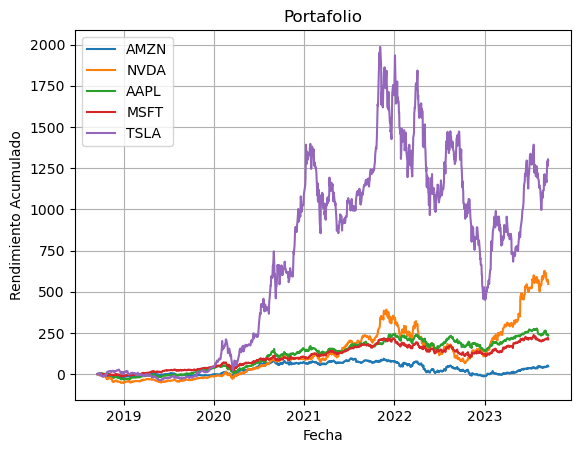

In [40]:
plt.plot((price1.Close/price1.Close[0]-1)*100,label=ticker1)
plt.plot((price2.Close/price2.Close[0]-1)*100,label=ticker2)
plt.plot((price3.Close/price3.Close[0]-1)*100,label=ticker3)
plt.plot((price4.Close/price4.Close[0]-1)*100,label=ticker4)
plt.plot((price5.Close/price5.Close[0]-1)*100,label=ticker5)

plt.legend((ticker1,ticker2,ticker3,ticker4,ticker5))
plt.title('Portafolio')
plt.xlabel('Fecha')
plt.ylabel('Rendimiento Acumulado')
plt.grid()

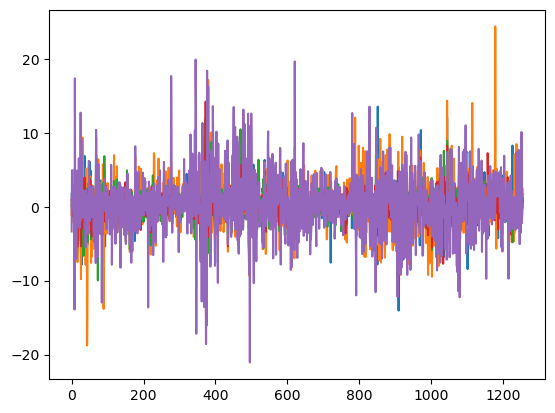

In [54]:
plt.plot(r1*100)
plt.plot(r2*100)
plt.plot(r3*100)
plt.plot(r4*100)
plt.plot(r5*100)
plt..axhline(y=np.mean)

In [58]:
resumen = pd.DataFrame(index=['Rendimiento (%)','Riesgo(%)' ])
resumen[ticker1] = [np.mean(r1)*100,np.std(r1)*100]
resumen[ticker2] = [np.mean(r2)*100,np.std(r2)*100]
resumen[ticker3] = [np.mean(r3)*100,np.std(r3)*100]
resumen[ticker4] = [np.mean(r4)*100,np.std(r4)*100]
resumen[ticker5] = [np.mean(r5)*100,np.std(r5)*100]
resumen

,AMZN,NVDA,AAPL,MSFT,TSLA
Rendimiento (%),0.059901,0.209532,0.118813,0.111830,0.297236
Riesgo(%),2.312210,3.402474,2.099601,1.973533,4.165450
